## Wearable Tech: Week 3 Assignment

### Step 1

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import matplotlib.dates as mdates

from datetime import datetime
import plotly.graph_objects as go

df = pd.read_csv("../Data/WBBtotal.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])
df

,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,AthleteID
Timestamp,,,,,,,,,
2019-01-08 17:39:42,0.0,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.1,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.2,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.3,0,0,0,0,0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.4,0,0,0,0,0,83,0.0,Athlete 1
...,...,...,...,...,...,...,...,...,...
2019-03-08 16:47:03,11484.4,0,0,0,0,0,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.5,0,0,0,0,0,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.6,0,0,0,0,0,101,1001.5,Athlete 5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016839 entries, 2019-01-08 17:39:42 to 2019-03-08 16:47:04
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Seconds       float64
 1   Velocity      int64  
 2   Acceleration  int64  
 3   Odometer      int64  
 4   Latitude      int64  
 5   Longitude     int64  
 6   Heart Rate    int64  
 7   Player Load   float64
 8   AthleteID     object 
dtypes: float64(2), int64(6), object(1)
memory usage: 306.5+ MB


### Step 2

In [12]:
#Make a new dataset (or dataframe) using only measures of interest (seconds, heart rate, player load and Athlete ID).

ColumnsToKeep = ['Seconds', 'Heart Rate' ,'Player Load','AthleteID']

df = df[ColumnsToKeep]
df

,Seconds,Heart Rate,Player Load,AthleteID
Timestamp,,,,
2019-01-08 17:39:42,0.0,83,0.0,Athlete 1
2019-01-08 17:39:42,0.1,83,0.0,Athlete 1
2019-01-08 17:39:42,0.2,83,0.0,Athlete 1
2019-01-08 17:39:42,0.3,83,0.0,Athlete 1
2019-01-08 17:39:42,0.4,83,0.0,Athlete 1
...,...,...,...,...
2019-03-08 16:47:03,11484.4,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.5,101,1001.5,Athlete 5
2019-03-08 16:47:03,11484.6,101,1001.5,Athlete 5


### Step 3

In [23]:
df.index = pd.to_datetime(df.index)
df = df.loc['2019-03-09']
df

,Seconds,Heart Rate,Player Load,AthleteID,ZeroHR
Timestamp,,,,,
2019-03-09 15:57:49,0.0,0,0.0,Athlete 10,1
2019-03-09 15:57:49,0.1,0,0.0,Athlete 10,1
2019-03-09 15:57:49,0.2,0,0.0,Athlete 10,1
2019-03-09 15:57:49,0.3,0,0.0,Athlete 10,1
2019-03-09 15:57:49,0.4,0,0.0,Athlete 10,1
...,...,...,...,...,...
2019-03-09 19:08:14,11348.4,108,470.6,Athlete 8,0
2019-03-09 19:08:14,11348.5,106,470.6,Athlete 8,0
2019-03-09 19:08:14,11348.6,106,470.6,Athlete 8,0


### Step 4

In [24]:
# Determine the total number of HR data points that were recorded with a value of zero.

ZeroHR = df[df['Heart Rate'] == 0].shape[0]
ZeroHR

69452

### Step 5

In [25]:
# Determine the % of the missing HR data for each individual athlete.

df['ZeroHR'] = (df['Heart Rate'] == 0).astype(int)

hr_data_summary = df.groupby('AthleteID')['ZeroHR'].sum()
hr_data_summary

AthleteID
Athlete 1      3001
Athlete 10    10032
Athlete 11     8293
Athlete 12     4632
Athlete 13     7848
Athlete 2      4758
Athlete 3      6732
Athlete 4      2920
Athlete 5      5475
Athlete 6      4717
Athlete 7      1751
Athlete 8      3590
Athlete 9      5703
Name: ZeroHR, dtype: int64

In [26]:
missing_hr_percentage = df.groupby('AthleteID')['Heart Rate'].apply(lambda x: ((x == 0).sum() / len(x)) * 100)

missing_hr_percentage

AthleteID
Athlete 1     2.646875
Athlete 10    8.779899
Athlete 11    7.308604
Athlete 12    4.074273
Athlete 13    6.923932
Athlete 2     4.179954
Athlete 3     5.930285
Athlete 4     2.567056
Athlete 5     4.818312
Athlete 6     4.153056
Athlete 7     1.544705
Athlete 8     3.163302
Athlete 9     5.010587
Name: Heart Rate, dtype: float64

### Step 6


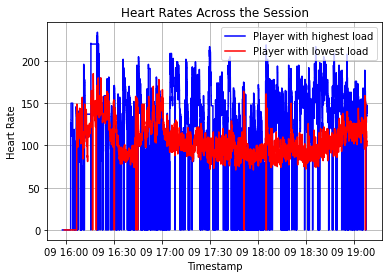

In [31]:
# Plot the heart rates across the session (ie. seconds vs heart rate) for the players with 
# the highest and the lowest player loads for the game session.

df.index = pd.to_datetime(df.index)

grouped = df.groupby('AthleteID')

player_loads = grouped['Player Load'].sum()

athlete_with_highest_load = player_loads.idxmax()
athlete_with_lowest_load = player_loads.idxmin()

data_high_load = grouped.get_group(athlete_with_highest_load)
data_low_load = grouped.get_group(athlete_with_lowest_load)

plt.figure(figsize=(6, 4))

plt.plot(data_high_load.index, data_high_load['Heart Rate'], label='Player with highest load', color='blue')

plt.plot(data_low_load.index, data_low_load['Heart Rate'], label='Player with lowest load', color='red')

plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.title('Heart Rates Across the Session')
plt.legend()
plt.grid(True)
plt.show()


### Step 7

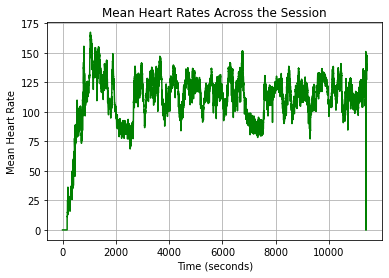

Approximate half-time period occurred at 5713.00 seconds or 95.22 minutes into the session.


In [32]:
# Plot the heart rates across the session (ie. seconds vs heart rate) for the mean of all players for 
# the game session and use the values to estimate when the half-time period occurred (approximately 
# how many seconds  (or minutes) into the session.

df.index = pd.to_datetime(df.index)

mean_heart_rates = df.groupby('Seconds')['Heart Rate'].mean()

plt.plot(mean_heart_rates.index, mean_heart_rates.values, color='green')

plt.xlabel('Time (seconds)')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rates Across the Session')
plt.grid(True)
plt.show()

half_time_seconds = mean_heart_rates.index[-1] / 2
half_time_minutes = half_time_seconds / 60
print("Approximate half-time period occurred at {:.2f} seconds or {:.2f} minutes into the session.".format(half_time_seconds, half_time_minutes))

### Step 8


In [34]:
# Using the same estimations as the workbook (i.e. maximal heart rate of 200 beats per minute and 
# resting heart rate of 60), calculate the TRIMP value for each player on the team.
# (Reminder - you need to calculate mean HR values to determine TRIMP)

max_hr = 200  # beats per minute
resting_hr = 60  # beats per minute

df['HRR'] = df['Heart Rate'] - resting_hr

def calculate_trimp(hr_values, durations):
    trimp = sum((hr - resting_hr) * duration for hr, duration in zip(hr_values, durations))
    return trimp

grouped = df.groupby('AthleteID')

trimp_values = {}
for athlete, data in grouped:
    durations = data.index.to_series().diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds()
    trimp_values[athlete] = calculate_trimp(data['Heart Rate'], durations)

for athlete, trimp in trimp_values.items():
    print(f"TRIMP for {athlete}: {trimp:.2f}")


TRIMP for Athlete 1: 900893.00
TRIMP for Athlete 10: 813841.00
TRIMP for Athlete 11: 461814.00
TRIMP for Athlete 12: 300494.00
TRIMP for Athlete 13: 475072.00
TRIMP for Athlete 2: 627924.00
TRIMP for Athlete 3: 320902.00
TRIMP for Athlete 4: 252312.00
TRIMP for Athlete 5: 755400.00
TRIMP for Athlete 6: 491660.00
TRIMP for Athlete 7: 889905.00
TRIMP for Athlete 8: 562383.00
TRIMP for Athlete 9: 867654.00


### Step 9

In [39]:
df = pd.read_csv("../Data/WBBtotal.csv", index_col =["Timestamp"], parse_dates=["Timestamp"])


In [42]:
# Identify the athletes with the top 5 TRIMP and player load scores.  Which of these was not part 
# of the top 5 on March 8th (answer can be found by looking back at  the workbook which focused on March 8th)
df.index = pd.to_datetime(df.index)
df = df.loc['2019-03-08']
top_5_march_8th = df 
top_5_player_load = df.nlargest(5, 'Player Load')

# Print the top 5 athletes based on player load score
print("Top 5 athletes based on player load score:")
print(top_5_player_load)

# Compare with the top 5 athletes on March 8th
# Assuming you have a DataFrame named 'top_5_march_8th' containing the top 5 athletes on March 8th
# You would need to adapt this part based on your actual data

# Identify the athletes who were not part of the top 5 on March 8th
not_in_march_8th_player_load = top_5_player_load[~top_5_player_load.index.isin(top_5_march_8th.index)]
not_in_march_8th_player_load_names = not_in_march_8th_player_load.index.tolist()

not_in_march_8th_player_load_names


Top 5 athletes based on player load score:
                     Seconds  Velocity  Acceleration  Odometer  Latitude  \
Timestamp                                                                  
2019-03-08 16:44:52  11361.5         0             0         0         0   
2019-03-08 16:44:52  11361.6         0             0         0         0   
2019-03-08 16:44:52  11361.7         0             0         0         0   
2019-03-08 16:44:52  11361.8         0             0         0         0   
2019-03-08 16:44:52  11361.9         0             0         0         0   

                     Longitude  Heart Rate  Player Load   AthleteID  
Timestamp                                                            
2019-03-08 16:44:52          0         141       1300.7  Athlete 10  
2019-03-08 16:44:52          0         141       1300.7  Athlete 10  
2019-03-08 16:44:52          0         141       1300.7  Athlete 10  
2019-03-08 16:44:52          0         141       1300.7  Athlete 10  
2019

[]